# Principal Component Analysis

*<h3>Principal component analysis (PCA) is a technique that is useful for the compression and classification of data. The purpose is to reduce the dimensionality of a data set (sample) by finding a new set of variables, smaller than the original set of variables, that nonetheless retains most of the sample's information</h3>*

![](https://miro.medium.com/max/1079/1*G1-n0R-c0IQ4GMrAzDNySw.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("../input/heart-disease-and-stroke-prevention/dataset.csv")
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_Limit_Low,Confidence_Limit_High,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),9.9,9.9,NaN,NaN,9.2,10.7,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),11.0,11.0,NaN,NaN,10.2,11.9,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),12.5,12.5,NaN,NaN,11.1,14.0,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
3,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),11.8,11.8,NaN,NaN,10.6,13.2,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
4,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),8.3,8.3,NaN,NaN,7.5,9.1,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"


In [4]:
data.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'Datasource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_Limit_Low', 'Confidence_Limit_High', 'Break_Out_Category',
       'Break_out', 'CategoryID', 'TopicID', 'IndicatorID',
       'Data_Value_TypeID', 'BreakoutCategoryID', 'BreakOutID', 'LocationID',
       'GeoLocation'],
      dtype='object')

In [5]:
data.describe()

,Year,Data_Value,Data_Value_Alt,Confidence_Limit_Low,Confidence_Limit_High,LocationID
count,85800.000000,57032.000000,85800.000000,55633.000000,55633.000000,85800.000000
mean,2013.000000,33.555527,21.780837,30.503187,36.873832,29.519231
std,1.414222,28.750550,28.712095,27.946300,29.497116,16.029502
min,2011.000000,0.100000,-2.000000,0.200000,0.600000,1.000000
25%,2012.000000,8.700000,-1.000000,7.200000,10.400000,16.750000
50%,2013.000000,26.400000,8.600000,22.300000,30.100000,29.500000
75%,2014.000000,52.400000,33.325000,44.400000,60.200000,42.500000
max,2015.000000,99.400000,99.400000,99.000000,99.700000,58.000000


In [6]:
data.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                    28768
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    57032
Data_Value_Footnote           57032
Confidence_Limit_Low          30167
Confidence_Limit_High         30167
Break_Out_Category                0
Break_out                         0
CategoryID                        0
TopicID                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakoutCategoryID                0
BreakOutID                        0
LocationID                  

In [7]:
filler = data["Data_Value"].mean()
data["Data_Value"] = data["Data_Value"].fillna(filler)

In [8]:
data["Data_Value_Unit"].unique()

array(['Percent (%)'], dtype=object)

In [9]:
data.drop("Data_Value_Unit", axis=1,inplace=True)

In [10]:
data.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value                        0
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    57032
Data_Value_Footnote           57032
Confidence_Limit_Low          30167
Confidence_Limit_High         30167
Break_Out_Category                0
Break_out                         0
CategoryID                        0
TopicID                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakoutCategoryID                0
BreakOutID                        0
LocationID                        0
GeoLocation                 

In [11]:
filler = data["Confidence_Limit_High"].mean()
data["Confidence_Limit_High"] = data["Confidence_Limit_High"].fillna(filler)

In [12]:
data["Data_Value_Footnote"].unique()

array([nan,
       'Statistically unstable estimates not presented [unstable by CDC standards: (standard error/estimate>0.30)]',
       'Data not available'], dtype=object)

In [13]:
data.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value                        0
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    57032
Data_Value_Footnote           57032
Confidence_Limit_Low          30167
Confidence_Limit_High             0
Break_Out_Category                0
Break_out                         0
CategoryID                        0
TopicID                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakoutCategoryID                0
BreakOutID                        0
LocationID                        0
GeoLocation                 

In [14]:
data.drop("Data_Value_Footnote_Symbol", axis=1,inplace=True)

In [15]:
filler = data["Confidence_Limit_Low"].mean()
data["Confidence_Limit_Low"] = data["Confidence_Limit_Low"].fillna(filler)

In [16]:
data.isna().sum().sort_values(ascending=False)

Data_Value_Footnote      57032
GeoLocation               1650
LocationID                   0
BreakOutID                   0
BreakoutCategoryID           0
Data_Value_TypeID            0
IndicatorID                  0
TopicID                      0
CategoryID                   0
Break_out                    0
Break_Out_Category           0
Confidence_Limit_High        0
Confidence_Limit_Low         0
Year                         0
LocationAbbr                 0
Data_Value                   0
Data_Value_Type              0
Indicator                    0
Topic                        0
Category                     0
PriorityArea4                0
PriorityArea3                0
PriorityArea2                0
PriorityArea1                0
Datasource                   0
LocationDesc                 0
Data_Value_Alt               0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85800 entries, 0 to 85799
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   85800 non-null  int64  
 1   LocationAbbr           85800 non-null  object 
 2   LocationDesc           85800 non-null  object 
 3   Datasource             85800 non-null  object 
 4   PriorityArea1          85800 non-null  object 
 5   PriorityArea2          85800 non-null  object 
 6   PriorityArea3          85800 non-null  object 
 7   PriorityArea4          85800 non-null  object 
 8   Category               85800 non-null  object 
 9   Topic                  85800 non-null  object 
 10  Indicator              85800 non-null  object 
 11  Data_Value_Type        85800 non-null  object 
 12  Data_Value             85800 non-null  float64
 13  Data_Value_Alt         85800 non-null  float64
 14  Data_Value_Footnote    28768 non-null  object 
 15  Co

#  Encoding

In [18]:
data.head()

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote,Confidence_Limit_Low,Confidence_Limit_High,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,9.9,9.9,NaN,9.2,10.7,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,11.0,11.0,NaN,10.2,11.9,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,12.5,12.5,NaN,11.1,14.0,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
3,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,11.8,11.8,NaN,10.6,13.2,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
4,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,8.3,8.3,NaN,7.5,9.1,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"


In [19]:
data.columns


Index(['Year', 'LocationAbbr', 'LocationDesc', 'Datasource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote', 'Confidence_Limit_Low', 'Confidence_Limit_High',
       'Break_Out_Category', 'Break_out', 'CategoryID', 'TopicID',
       'IndicatorID', 'Data_Value_TypeID', 'BreakoutCategoryID', 'BreakOutID',
       'LocationID', 'GeoLocation'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85800 entries, 0 to 85799
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   85800 non-null  int64  
 1   LocationAbbr           85800 non-null  object 
 2   LocationDesc           85800 non-null  object 
 3   Datasource             85800 non-null  object 
 4   PriorityArea1          85800 non-null  object 
 5   PriorityArea2          85800 non-null  object 
 6   PriorityArea3          85800 non-null  object 
 7   PriorityArea4          85800 non-null  object 
 8   Category               85800 non-null  object 
 9   Topic                  85800 non-null  object 
 10  Indicator              85800 non-null  object 
 11  Data_Value_Type        85800 non-null  object 
 12  Data_Value             85800 non-null  float64
 13  Data_Value_Alt         85800 non-null  float64
 14  Data_Value_Footnote    28768 non-null  object 
 15  Co

In [21]:
from category_encoders import CountEncoder
enc = CountEncoder(normalize=True, cols=['Break_Out_Category', 'BreakoutCategoryID'])
data = enc.fit_transform(data)

In [22]:
from sklearn.preprocessing import OneHotEncoder

data= pd.get_dummies(data, columns = ['LocationAbbr', 'Datasource'])


In [23]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['LocationDesc','Topic'])
data=ordenc.fit_transform(data)

In [24]:
data.head()

,Year,LocationDesc,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote,Confidence_Limit_Low,Confidence_Limit_High,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,LocationAbbr_DC,LocationAbbr_DE,LocationAbbr_FL,LocationAbbr_GA,LocationAbbr_HI,LocationAbbr_IA,LocationAbbr_ID,LocationAbbr_IL,LocationAbbr_IN,LocationAbbr_KS,LocationAbbr_KY,LocationAbbr_LA,LocationAbbr_MA,LocationAbbr_MD,LocationAbbr_ME,LocationAbbr_MI,LocationAbbr_MN,LocationAbbr_MO,LocationAbbr_MS,LocationAbbr_MT,LocationAbbr_NC,LocationAbbr_ND,LocationAbbr_NE,LocationAbbr_NH,LocationAbbr_NJ,LocationAbbr_NM,LocationAbbr_NV,LocationAbbr_NY,LocationAbbr_OH,LocationAbbr_OK,LocationAbbr_OR,LocationAbbr_PA,LocationAbbr_RI,LocationAbbr_SC,LocationAbbr_SD,LocationAbbr_TN,LocationAbbr_TX,LocationAbbr_USM,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY,Datasource_BRFSS
0,2011,1,None,None,None,None,Cardiovascular Diseases,1,Prevalence of major cardiovascular disease amo...,Age-Standardized,9.9,9.9,NaN,9.2,10.7,0.090909,Overall,C1,T1,BR001,AgeStdz,0.090909,OVR01,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2011,1,None,None,None,None,Cardiovascular Diseases,1,Prevalence of major cardiovascular disease amo...,Crude,11.0,11.0,NaN,10.2,11.9,0.090909,Overall,C1,T1,BR001,Crude,0.090909,OVR01,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,1,None,None,None,None,Cardiovascular Diseases,1,Prevalence of major cardiovascular disease amo...,Crude,12.5,12.5,NaN,11.1,14.0,0.181818,Male,C1,T1,BR001,Crude,0.181818,GEN01,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2011,1,None,None,None,None,Cardiovascular Diseases,1,Prevalence of major cardiovascular disease amo...,Age-Standardized,11.8,11.8,NaN,10.6,13.2,0.181818,Male,C1,T1,BR001,AgeStdz,0.181818,GEN01,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,1,None,None,None,None,Cardiovascular Diseases,1,Prevalence of major cardiovascular disease amo...,Age-Standardized,8.3,8.3,NaN,7.5,9.1,0.181818,Female,C1,T1,BR001,AgeStdz,0.181818,GEN02,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
data.shape

(85800, 78)

In [26]:
data.drop(["PriorityArea1","PriorityArea2","PriorityArea3","PriorityArea4"], axis=1, inplace=True)

In [27]:
data.drop(["Data_Value_Footnote"], axis=1, inplace=True)

In [28]:
data["Category"].unique()

array(['Cardiovascular Diseases', 'Risk Factors'], dtype=object)

In [29]:
maap={"Cardiovascular Diseases":0,"Risk Factors":1}
for i in range(data.shape[0]):
    status=data["Category"][i]
    data["Category"][i]=maap[status]
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
data["Category"].unique()

array([0, 1], dtype=object)

In [31]:
data.head()

,Year,LocationDesc,Category,Topic,Indicator,Data_Value_Type,Data_Value,Data_Value_Alt,Confidence_Limit_Low,Confidence_Limit_High,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,LocationAbbr_DC,LocationAbbr_DE,LocationAbbr_FL,LocationAbbr_GA,LocationAbbr_HI,LocationAbbr_IA,LocationAbbr_ID,LocationAbbr_IL,LocationAbbr_IN,LocationAbbr_KS,LocationAbbr_KY,LocationAbbr_LA,LocationAbbr_MA,LocationAbbr_MD,LocationAbbr_ME,LocationAbbr_MI,LocationAbbr_MN,LocationAbbr_MO,LocationAbbr_MS,LocationAbbr_MT,LocationAbbr_NC,LocationAbbr_ND,LocationAbbr_NE,LocationAbbr_NH,LocationAbbr_NJ,LocationAbbr_NM,LocationAbbr_NV,LocationAbbr_NY,LocationAbbr_OH,LocationAbbr_OK,LocationAbbr_OR,LocationAbbr_PA,LocationAbbr_RI,LocationAbbr_SC,LocationAbbr_SD,LocationAbbr_TN,LocationAbbr_TX,LocationAbbr_USM,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY,Datasource_BRFSS
0,2011,1,0,1,Prevalence of major cardiovascular disease amo...,Age-Standardized,9.9,9.9,9.2,10.7,0.090909,Overall,C1,T1,BR001,AgeStdz,0.090909,OVR01,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2011,1,0,1,Prevalence of major cardiovascular disease amo...,Crude,11.0,11.0,10.2,11.9,0.090909,Overall,C1,T1,BR001,Crude,0.090909,OVR01,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,1,0,1,Prevalence of major cardiovascular disease amo...,Crude,12.5,12.5,11.1,14.0,0.181818,Male,C1,T1,BR001,Crude,0.181818,GEN01,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2011,1,0,1,Prevalence of major cardiovascular disease amo...,Age-Standardized,11.8,11.8,10.6,13.2,0.181818,Male,C1,T1,BR001,AgeStdz,0.181818,GEN01,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,1,0,1,Prevalence of major cardiovascular disease amo...,Age-Standardized,8.3,8.3,7.5,9.1,0.181818,Female,C1,T1,BR001,AgeStdz,0.181818,GEN02,1,"(32.84057112200048, -86.63186076199969)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
data["Data_Value_Type"].unique()

array(['Age-Standardized', 'Crude'], dtype=object)

In [33]:
map={"Age-Standardized":0,"Crude":1}
for i in range(data.shape[0]):
    status=data["Data_Value_Type"][i]
    data["Data_Value_Type"][i]=map[status]
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
data["Data_Value_Type"].unique()

array([0, 1], dtype=object)

In [35]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['CategoryID','TopicID','Indicator','Data_Value_TypeID','GeoLocation','Break_out','BreakOutID','IndicatorID'])
data=ordenc.fit_transform(data)

In [36]:
data.head()

,Year,LocationDesc,Category,Topic,Indicator,Data_Value_Type,Data_Value,Data_Value_Alt,Confidence_Limit_Low,Confidence_Limit_High,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,LocationAbbr_DC,LocationAbbr_DE,LocationAbbr_FL,LocationAbbr_GA,LocationAbbr_HI,LocationAbbr_IA,LocationAbbr_ID,LocationAbbr_IL,LocationAbbr_IN,LocationAbbr_KS,LocationAbbr_KY,LocationAbbr_LA,LocationAbbr_MA,LocationAbbr_MD,LocationAbbr_ME,LocationAbbr_MI,LocationAbbr_MN,LocationAbbr_MO,LocationAbbr_MS,LocationAbbr_MT,LocationAbbr_NC,LocationAbbr_ND,LocationAbbr_NE,LocationAbbr_NH,LocationAbbr_NJ,LocationAbbr_NM,LocationAbbr_NV,LocationAbbr_NY,LocationAbbr_OH,LocationAbbr_OK,LocationAbbr_OR,LocationAbbr_PA,LocationAbbr_RI,LocationAbbr_SC,LocationAbbr_SD,LocationAbbr_TN,LocationAbbr_TX,LocationAbbr_USM,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY,Datasource_BRFSS
0,2011,1,0,1,1,0,9.9,9.9,9.2,10.7,0.090909,1,1,1,1,1,0.090909,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2011,1,0,1,1,1,11.0,11.0,10.2,11.9,0.090909,1,1,1,1,2,0.090909,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,1,0,1,1,1,12.5,12.5,11.1,14.0,0.181818,2,1,1,1,2,0.181818,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2011,1,0,1,1,0,11.8,11.8,10.6,13.2,0.181818,2,1,1,1,1,0.181818,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,1,0,1,1,0,8.3,8.3,7.5,9.1,0.181818,3,1,1,1,1,0.181818,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85800 entries, 0 to 85799
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   85800 non-null  int64  
 1   LocationDesc           85800 non-null  int64  
 2   Category               85800 non-null  object 
 3   Topic                  85800 non-null  int64  
 4   Indicator              85800 non-null  int64  
 5   Data_Value_Type        85800 non-null  object 
 6   Data_Value             85800 non-null  float64
 7   Data_Value_Alt         85800 non-null  float64
 8   Confidence_Limit_Low   85800 non-null  float64
 9   Confidence_Limit_High  85800 non-null  float64
 10  Break_Out_Category     85800 non-null  float64
 11  Break_out              85800 non-null  int64  
 12  CategoryID             85800 non-null  int64  
 13  TopicID                85800 non-null  int64  
 14  IndicatorID            85800 non-null  int64  
 15  Da

# Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaled_data= scaler.fit_transform(data)

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

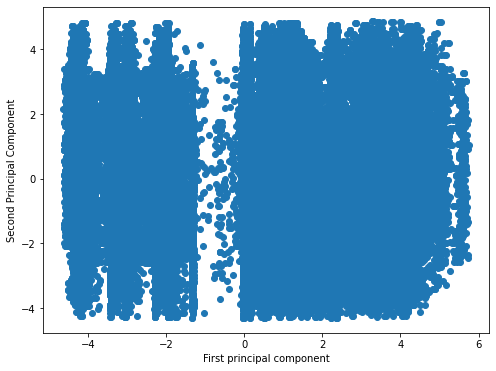

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [41]:
pca.components_

array([[-1.44244734e-03, -3.97986773e-04,  3.12329098e-01,
         3.42333403e-01,  3.43912333e-01,  5.44147040e-03,
         2.96774275e-01,  2.71192262e-01,  2.87277700e-01,
         2.99460650e-01,  7.82713178e-04,  5.24102790e-03,
         3.12329098e-01,  3.42333403e-01,  3.43912333e-01,
         5.44147040e-03,  7.82713178e-04,  5.24102790e-03,
        -6.81671961e-05, -3.97986773e-04, -3.64221069e-04,
         8.44386519e-04,  5.73288392e-04,  2.99327669e-04,
        -5.91643179e-04, -6.59604814e-04, -5.14993661e-04,
        -3.68136336e-04,  9.94294224e-04, -3.38603454e-04,
         1.20956471e-03, -1.23201253e-03,  6.21083621e-04,
        -8.63245571e-04, -5.83636732e-05,  2.82701058e-04,
        -1.15711856e-04,  6.52465943e-04,  2.02937008e-04,
        -1.20936055e-03,  6.50495250e-04, -3.43000642e-05,
         8.60237924e-04, -2.92450703e-04,  4.71970666e-04,
         4.21916010e-04, -5.90540241e-04,  2.37040187e-04,
         1.83196722e-04, -2.23250171e-04, -2.16541420e-0

In [42]:
dt_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=data.columns)
dt_comp

,Year,LocationDesc,Category,Topic,Indicator,Data_Value_Type,Data_Value,Data_Value_Alt,Confidence_Limit_Low,Confidence_Limit_High,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,LocationAbbr_DC,LocationAbbr_DE,LocationAbbr_FL,LocationAbbr_GA,LocationAbbr_HI,LocationAbbr_IA,LocationAbbr_ID,LocationAbbr_IL,LocationAbbr_IN,LocationAbbr_KS,LocationAbbr_KY,LocationAbbr_LA,LocationAbbr_MA,LocationAbbr_MD,LocationAbbr_ME,LocationAbbr_MI,LocationAbbr_MN,LocationAbbr_MO,LocationAbbr_MS,LocationAbbr_MT,LocationAbbr_NC,LocationAbbr_ND,LocationAbbr_NE,LocationAbbr_NH,LocationAbbr_NJ,LocationAbbr_NM,LocationAbbr_NV,LocationAbbr_NY,LocationAbbr_OH,LocationAbbr_OK,LocationAbbr_OR,LocationAbbr_PA,LocationAbbr_RI,LocationAbbr_SC,LocationAbbr_SD,LocationAbbr_TN,LocationAbbr_TX,LocationAbbr_USM,LocationAbbr_UT,LocationAbbr_VA,LocationAbbr_VT,LocationAbbr_WA,LocationAbbr_WI,LocationAbbr_WV,LocationAbbr_WY,Datasource_BRFSS
PC1,-0.001442,-0.000398,0.312329,0.342333,0.343912,0.005441,0.296774,0.271192,0.287278,0.299461,0.000783,0.005241,0.312329,0.342333,0.343912,0.005441,0.000783,0.005241,-0.000068,-0.000398,-0.000364,0.000844,0.000573,0.000299,-0.000592,-0.000660,-0.000515,-0.000368,0.000994,-0.000339,0.001210,-0.001232,0.000621,-0.000863,-0.000058,0.000283,-0.000116,0.000652,0.000203,-0.001209,0.000650,-0.000034,0.000860,-0.000292,0.000472,0.000422,-0.000591,0.000237,0.000183,-0.000223,-0.000217,-0.001160,-0.000471,0.000083,-0.000672,0.000978,0.000629,0.000298,0.000221,-0.000328,0.001029,-0.000633,0.000677,-0.000496,0.000823,-0.000921,-0.000118,-0.000931,-0.000352,0.000523,0.000929,-0.000938,-0.0
PC2,-0.000127,-0.407693,-0.002633,-0.000686,-0.000834,0.050524,-0.006571,0.042153,0.007389,-0.021637,-0.288522,-0.287213,-0.002633,-0.000686,-0.000834,0.050524,-0.288522,-0.287213,-0.395075,-0.407693,0.097276,0.101256,0.088522,0.092444,0.085020,0.079819,0.075967,0.065451,0.072040,0.061906,0.058019,0.053010,0.037507,0.048847,0.045215,0.041426,0.033981,0.029888,0.026079,0.014745,0.018548,0.022090,0.010878,0.007012,-0.000723,0.003059,-0.004644,-0.031259,-0.035364,-0.008270,-0.016230,-0.019675,-0.023634,-0.012247,-0.027403,-0.038919,-0.042688,-0.046744,-0.050452,-0.055539,-0.059245,-0.063364,-0.067082,-0.070691,0.012486,-0.074679,-0.082261,-0.078744,-0.087167,-0.095125,-0.091317,-0.099028,0.0


In [43]:
dt_comp.shape

(2, 73)

In [44]:
pca.explained_variance_ratio_

array([0.09500736, 0.05426917])

In [45]:
np.sum(pca.explained_variance_ratio_)

0.14927653087051546

In [46]:
explained_variance_ratio = []

for n in range(1,73):
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    
    explained_variance_ratio.append(np.sum(pca.explained_variance_ratio_))

In [47]:
explained_variance_ratio

[0.09500736484790952,
 0.14927653147419626,
 0.20350300536139482,
 0.2330141438039932,
 0.2601750281327785,
 0.2753113739898644,
 0.2894394452806673,
 0.30314406818147926,
 0.31765709836222183,
 0.3316906391912209,
 0.3455470929865246,
 0.36030087850529535,
 0.37455042313715475,
 0.38865066338497034,
 0.40282273226534193,
 0.4169213204653802,
 0.4310939105414597,
 0.44544109040173496,
 0.4596177180329472,
 0.4736340733457498,
 0.4876463017108568,
 0.5022389574551179,
 0.5162275664275783,
 0.5304128948061129,
 0.544795876546693,
 0.5588248667684952,
 0.5730542031137986,
 0.5873720462385041,
 0.6014901923692018,
 0.6154742805069388,
 0.629744684000487,
 0.6436734883642599,
 0.65795488320748,
 0.6721807015237489,
 0.6864719709714866,
 0.7005905363877949,
 0.7149290024119224,
 0.7289588471023629,
 0.7431827372838687,
 0.7573142471709364,
 0.7715256123953069,
 0.785664285691503,
 0.7999070586701751,
 0.8140988062833321,
 0.8282152514937071,
 0.8424195905553711,
 0.8565907565507003,
 0.87075

Text(0, 0.5, 'Variance Explained_ratio')

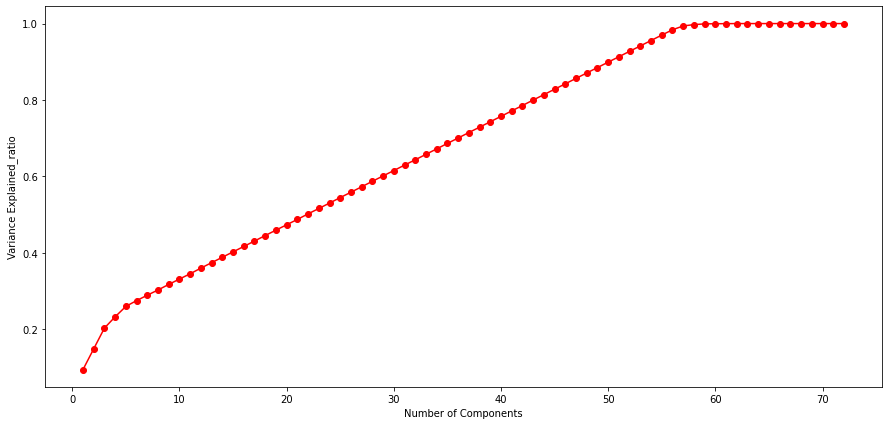

In [48]:
plt.figure(figsize=(15,7))
plt.plot(range(1,73),explained_variance_ratio, 'o-',c="red")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained_ratio")

In [49]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(72,)

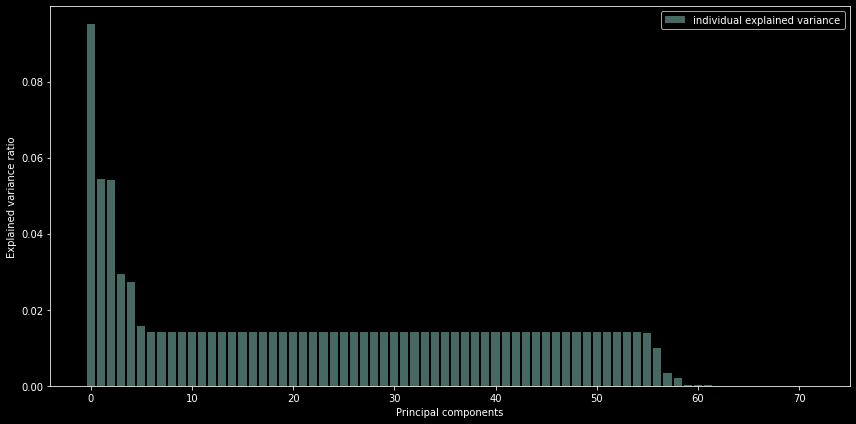

In [50]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 6))

    plt.bar(range(72), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()